In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the API endpoint and parameters
url = "https://api.fda.gov/food/enforcement.json?search=report_date:[20200101+TO+20240804]&limit=500"

# Send a GET request to the API
response = requests.get(url)


# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Extract the list of results (recalls)
    recalls = data.get('results', [])
    
    # Create a DataFrame from the list of recall records
    recall_df = pd.DataFrame(recalls)
    
    # Save the DataFrame to a CSV file
    recall_df.to_csv('fda_food_enforcement_data.csv', index=False)

In [3]:
clean_df = recall_df.rename(columns={"status": "Status", 
                                     "city": "City",
                                     "state": "State",
                                     "country":"Country",
                                     "classification":"Classification",
                                     "openfda":"Open FDA",
                                     "product_type":"Product Type",
                                     "event_id":"Event ID",
                                     "recalling_firm":"Recalling Firm",
                                     "address_1":"Address 1",
                                     "address_2":"Address 2",
                                     "postal_code":"Postal Code",
                                     "voluntary_mandated":"Voluntary Mandated",
                                     "initial_firm_notification":"Initial Firm Notification",
                                     "distribution_pattern":"Distribution Pattern",
                                     "recall_number":"Recall Number",
                                     "product_description":"Product Description",
                                     "product_quantity":"Product Quantity",
                                     "reason_for_recall":"Reason for Recall",
                                     "recall_initiation_date":"Recall Initiation Date",
                                     "center_classification_date":"Center Classification Date",
                                     "termination_date":"Termination Date",
                                     "report_date":"Report Date",
                                     "code_info":"Code Info",
                                     "more_code_info":"More Code Info",
                                    
                                     })

clean_df


,Status,City,State,Country,Classification,Open FDA,Product Type,Event ID,Recalling Firm,Address 1,...,Recall Number,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Center Classification Date,Termination Date,Report Date,Code Info,More Code Info
0,Terminated,Rancho Dominguez,CA,United States,Class III,{},Food,85253,"Organic By Nature, Inc.",2610 Homestead Pl,...,F-0904-2020,Pure Planet Organic Parasite Cleanse; Net Wt....,xx,Firm was notified by supplier that Organic Gro...,20200224,20200413,20210202,20200401,Lot codes: 72746,
1,Terminated,Brooklyn,NY,United States,Class III,{},Food,85364,Rong Shing Trading NY Inc,47 Bridgewater St # 57,...,F-0921-2020,"XinXing Dried Plum, Net Wt. 5.3 oz.(150g)",unknown,"Product contains dried peaches, but front labe...",20200401,20200424,20210318,20200506,UPC CODE: 6868978724496 BEST BEFORE: 11/15/2021,NaN
2,Terminated,Monterey,CA,United States,Class I,{},Food,89381,Dole Fresh Vegetables Inc,2959 Salinas Hwy,...,F-0757-2022,Marketside 12oz Classic Salad UPC:6-81131-328...,,Harvest equipment used in harvesting raw icebe...,20220106,20220222,20220322,20220302,Product codes beginning with B - Best by Dates...,
3,Terminated,Lovell,WY,United States,Class II,{},Food,90158,"Queen Bee Gardens, LLC",262 E Main St,...,F-1472-2022,Honey Caramels Blue Raspberry. Product availab...,171 pieces,Products may potentially contain one or more o...,20220428,20220719,20230117,20220727,None,NaN
4,Terminated,Nof Ha-Galil,,Israel,Class I,{},Food,90105,ELITE CONFECTIONERY LTD,Nazareth-Ilit,...,F-1233-2022,ELITE MILK CHOCOLATE COATED RICE CAKES UPC:81...,unknown,Potential contamination with Salmonella,20220428,20220604,20221103,20220615,All lots,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Ongoing,Salinas,CA,United States,Class I,{},Food,92684,Braga Fresh Foods,121 Spreckels Blvd Bldg 10,...,F-1293-2023,365 by Whole Foods Market Organic Asian Inspir...,673 cases,Undeclared milk and egg,20230710,20230725,NaN,20230726,Lot code - BFFS179A2 Best if Used By: 7/16/2023,
496,Terminated,Bharuch,,India,Class I,{},Food,92067,JABSONS FOODS PRIVATE LIMITED (Formerly Known ...,"A-2, Bholav Udhyog Nagar",...,F-0817-2023,Tandoori Kaju- Cashew Nuts; Net. Wt 3.53 oz L...,187 cases,Undeclared Milk,20230319,20230504,20230804,20230510,"UPC Code 8904067711577 Lot # US4-09, US4-08,US...",
497,Completed,East Arlington,VT,United States,Class I,{},Food,93452,WILCOX ICE CREAM,116 Sweet St,...,F-0538-2024,"Wilcox Premium Maple Walnut in 1.5QT, Quart, P...",19.31 Tons Total,Products may be contaminated with Listeria mon...,20231115,20231208,NaN,20231220,Best By/Sell By dates of 9/14/24 to 11/14/24,NaN
498,Terminated,Inver Grove Heights,MN,United States,Class I,{},Food,93516,"Cut Fruit Express, Inc.",11585 Courthouse Blvd,...,F-0583-2024,"Mixed Fruit Products that contain Cantaloupe, ...",123 units,Cantaloupe containing products may be contamin...,20231124,20231213,20240111,20231220,1. 11/5/23 2. 11/5/23 3. 11/4/23 4. 11/4/...,NaN


## Which States are impacted by recalls?

In [4]:
# Remove rows with blank states
clean_df = clean_df[clean_df['State'].str.strip() != '']
states_impacted = clean_df['State'].unique()
states_impactedcount = len(states_impacted)
time_period = clean_df['Report Date'].unique()

time_period_dates = pd.to_datetime(time_period)

# Sort dates
time_period_dates = time_period_dates.sort_values()

earliest_date = time_period_dates[0]
latest_date = time_period_dates[-1]

# Print the earliest and latest dates 
print(f"Earliest Date: {earliest_date.strftime('%B %Y')}")
print(f"Latest Date: {latest_date.strftime('%B %Y')}")


print(states_impacted)
print(str(states_impactedcount) + ' States Impacted by FDA Recalls' + ' '+'between ' + earliest_date.strftime('%B %Y') + ' to ' + latest_date.strftime('%B %Y'))

Earliest Date: January 2020
Latest Date: July 2024
['CA' 'NY' 'WY' 'AZ' 'OH' 'MS' 'MD' 'KS' 'MA' 'IL' 'SC' 'MI' 'NJ' 'FL'
 'NM' 'TX' 'GA' 'WI' 'WA' 'PA' 'MN' 'ID' 'NV' 'OR' 'IA' 'N/A' 'VT' 'MO'
 'UT' 'CT' 'VA' 'NE' 'DE' 'IN' 'AR' 'KY' 'CO' 'NC' 'NH' 'OK' 'AL' 'PR'
 'ND']
43 States Impacted by FDA Recalls between January 2020 to July 2024


## Which states are most frequently impacted by product recalls?

In [5]:
# Get the count of recalls for each state
state_counts = clean_df['State'].value_counts()


print(state_counts)

# The top 5 most impacted states
most_impacted_states = state_counts.head(5).index.tolist()

print(most_impacted_states)


State
CA     55
NY     47
OH     41
MD     39
IL     31
FL     29
WA     21
GA     21
PA     14
TX     14
OR     14
NJ     13
MN     13
MI     12
MA     11
WI     11
NM      9
VT      8
UT      8
VA      8
NC      7
ID      7
IA      6
KS      6
AZ      6
IN      5
MO      4
CT      4
CO      4
WY      4
NH      3
N/A     3
PR      2
SC      2
AR      2
NV      1
AL      1
OK      1
DE      1
KY      1
NE      1
MS      1
ND      1
Name: count, dtype: int64
['CA', 'NY', 'OH', 'MD', 'IL']


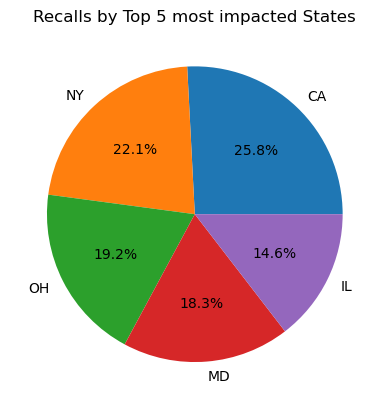

In [6]:
# Get the top 5 most impacted states
top_states = most_impacted_states[:5]

# Get the count of recalls for each state
state_counts = clean_df['State'].value_counts()

# Filter the state counts for the top 5 states
top_state_counts = state_counts[state_counts.index.isin(top_states)]

# Plot 
plt.pie(top_state_counts, labels=top_states, autopct='%1.1f%%')
plt.title('Recalls by Top 5 most impacted States')
plt.show()

In [7]:
## Most Prevelant Classes in Top 5 Recall States

most_prevalent_classes = {}

# Loop through each state in most_impacted_states
for state in most_impacted_states:
    # Filter the DataFrame for the current state
    state_df = clean_df[clean_df['State'] == state]
    
    # Get the counts of each class in the current state
    class_counts = state_df['Classification'].value_counts()
    
    # Find the most common class and its count
    most_common_class = class_counts.idxmax()
    most_common_class_count = class_counts.max()

    # Calculate the total count of all classes
    total_class_count = class_counts.sum()
    
    
    most_prevalent_classes[state] = {
        'most_common_class': most_common_class,
        'most_common_class_count': most_common_class_count,
        'total_class_count': total_class_count
    }


print(most_prevalent_classes)

{'CA': {'most_common_class': 'Class I', 'most_common_class_count': 27, 'total_class_count': 55}, 'NY': {'most_common_class': 'Class I', 'most_common_class_count': 22, 'total_class_count': 47}, 'OH': {'most_common_class': 'Class II', 'most_common_class_count': 23, 'total_class_count': 41}, 'MD': {'most_common_class': 'Class I', 'most_common_class_count': 35, 'total_class_count': 39}, 'IL': {'most_common_class': 'Class I', 'most_common_class_count': 20, 'total_class_count': 31}}


<Figure size 1200x800 with 0 Axes>

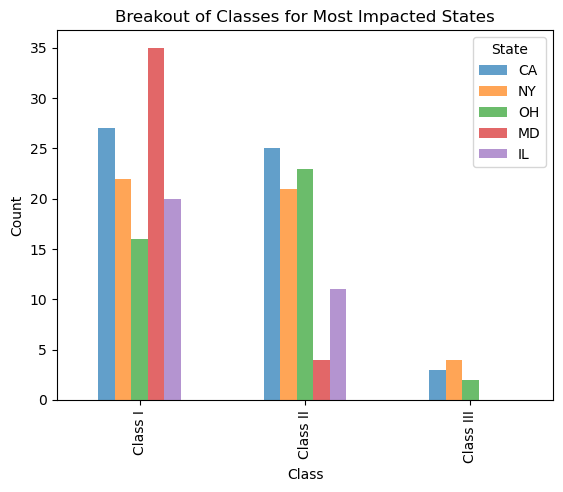

In [8]:
# Get the most prevalent classes for each state
most_prevalent_classes = ['Class I', 'Class II', 'Class III']

# Create a dictionary to store the class counts for each state
class_counts_by_state = {}

# Loop 
for state in most_impacted_states:
    # Filter the DataFrame 
    state_df = clean_df[clean_df['State'] == state]
    
    # Get the counts of each class in the current state
    class_counts = state_df['Classification'].value_counts()
    
    # Filter the class counts for the most prevalent classes
    class_counts = class_counts[class_counts.index.isin(most_prevalent_classes)]
    
    # Store the class counts 
    class_counts_by_state[state] = class_counts


class_counts_df = pd.DataFrame(class_counts_by_state).fillna(0)

# Plot 
plt.figure(figsize=(12, 8))
class_counts_df.plot(kind='bar', alpha=0.7)
plt.title('Breakout of Classes for Most Impacted States')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='State')
plt.show()

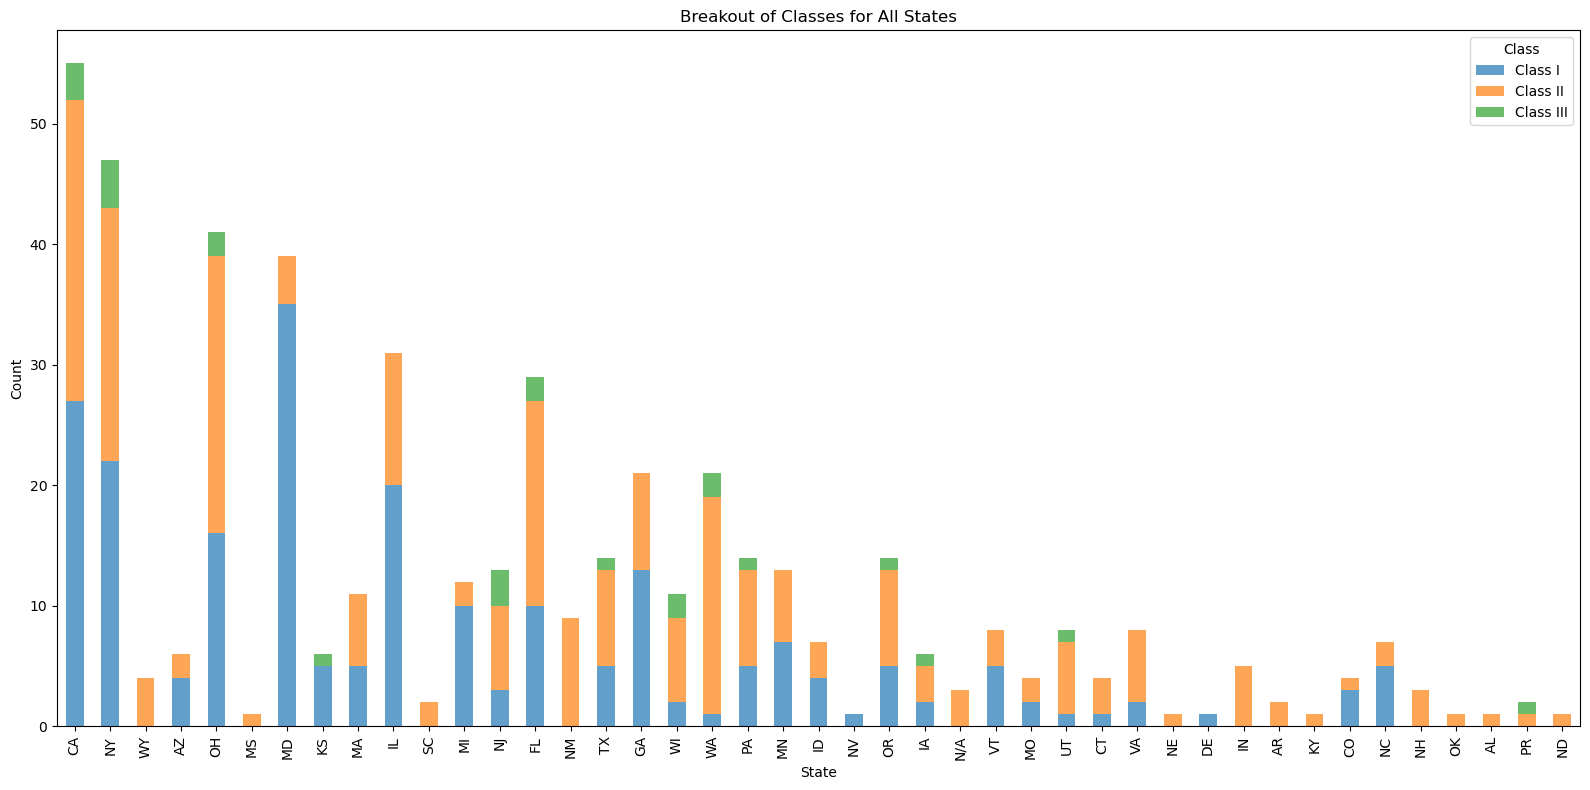

In [9]:
# Get the most prevalent classes for each state
most_prevalent_classes = ['Class I', 'Class II', 'Class III']

# Create a dictionary to store the class counts for each state
class_counts_by_state = {}

# Loop through each unique state in the DataFrame
for state in clean_df['State'].unique():
    # Filter the DataFrame for the current state
    state_df = clean_df[clean_df['State'] == state]
    
    # Get the counts of each class in the current state
    class_counts = state_df['Classification'].value_counts()
    
    # Filter the class counts for the most prevalent classes
    class_counts = class_counts[class_counts.index.isin(most_prevalent_classes)]
    
    # Store the class counts in the dictionary
    class_counts_by_state[state] = class_counts

# Convert the dictionary to a DataFrame
class_counts_df = pd.DataFrame(class_counts_by_state).fillna(0)

# Plot 
class_counts_df.T.plot(kind='bar', stacked=True, figsize=(16, 8), alpha=0.7)
plt.title('Breakout of Classes for All States')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

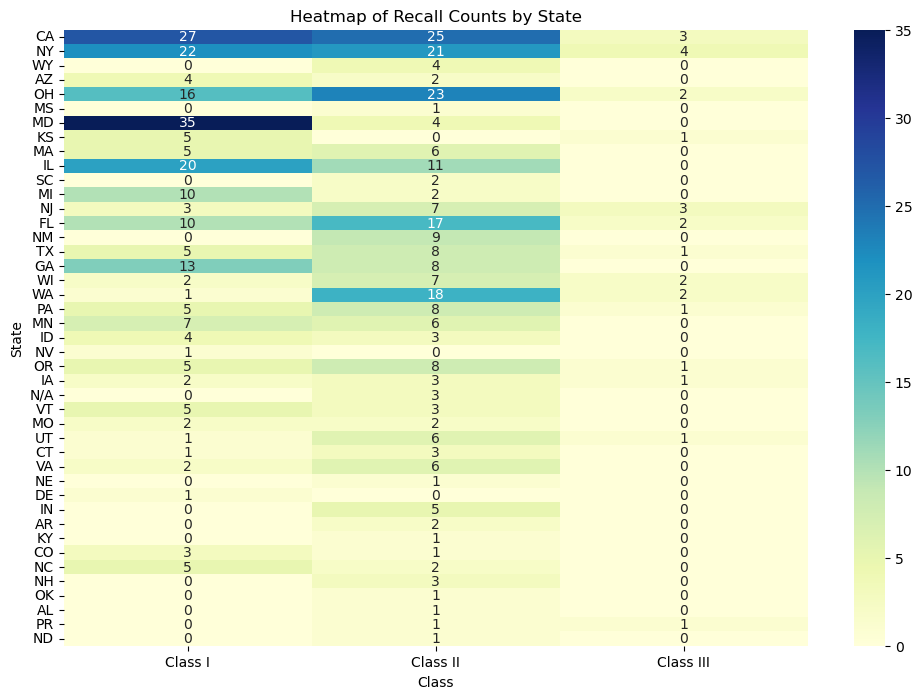

In [10]:


# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(class_counts_df.T, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap of Recall Counts by State')
plt.xlabel('Class')
plt.ylabel('State')
plt.show()